# CS251: Data Analysis and Visualization

## Using SciPy's Least Squares Solver to perform Polynomial Regression

Spring 2023

Oliver W. Layton and Stephanie Taylor

In [2]:
# Import libraries we need
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lstsq

In [3]:
# Import project-related code
import data
import analysis
import transformation

## Simple Quadratic Example

[[ 6.8       ]
 [-4.44285714]
 [ 2.64285714]]
[[-17.86666667]
 [ 14.05714286]]
R^2 for line = 0.89


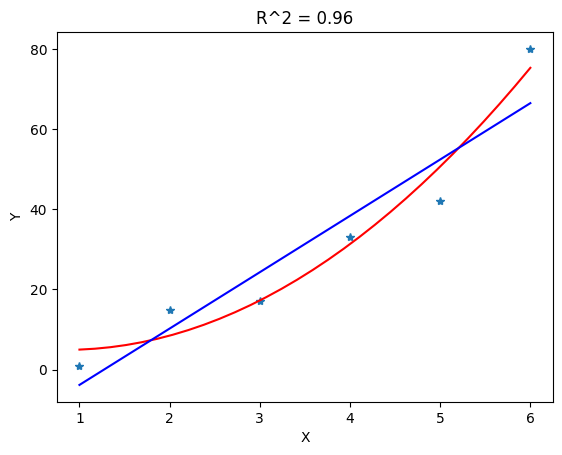

In [5]:
N = 6
x = np.array( [1,4,2,6,3,5]).reshape( (N,) )
#y = 3 + -1*x + 2*x**2 # SRT used this to find a perfect set of points
y = np.array( [1,  33,  15, 80,  17, 42] ).reshape((N,1)) # then manipulated them to be not perfect

# Plot the points
plt.plot( x, y, '*')
plt.xlabel( "X")
plt.ylabel("Y")

# Make Ahat
Ahat = np.ones((N,3))
for i in range(1,3):
    Ahat[:,i] = x**i
# Find c
c, _, _, _ = lstsq( Ahat, y )
print(c)


# Make x values for line of regression
xline = np.linspace(x.min(),x.max(),30)
# Compute y values for line of regression
rline = c[0] + c[1]*xline + c[2]*xline**2

# Plot line of regression
plt.plot( xline, rline, 'r')
# Compute R2
yhat = Ahat @ c
residuals = y - yhat
R2 = 1 - np.sum(residuals**2)/np.sum((y-y.mean())**2)
# And add it as title
plt.title(f"R^2 = {R2:0.2f}")

# Add line of linear regression
# Make Ahat
Ahat = np.ones((N,2))
for i in range(1,2):
    Ahat[:,i] = x**i
# Find c
c, _, _, _ = lstsq( Ahat, y )
print(c)

# Make x values for line of regression
xline = np.linspace(x.min(),x.max(),30)
# Compute y values for line of regression
rline = c[0] + c[1]*xline
plt.plot( xline, rline, 'b')
yPred = Ahat @ c
resid = y - yPred
R2 = 1 - np.sum(resid**2) / np.sum((y - np.mean(y))**2)

print(f"R^2 for line = {R2:0.2f}")





## Load in SAT data

CSV filename: `state_population_SAT.csv`

In [6]:
dobj = data.Data('data/state_population_SAT.csv')
print(dobj)

--------------------------------
data/state_population_SAT.csv (50x10)
Headers:
  Cap_Long    Cap_Lat    MTotal    FTotal    Teacher_Pay    %TakingSAT    SAT-V    SAT-M    SqMiles    ACT    
-------------------------------
Showing first 5/50 rows.
-86.279118    32.361538    2258087.0    2403813.0    37956.0    9.0    559.0    554.0    50750.0    20.3    
-134.41974    58.301935    357607.0    328686.0    48123.0    51.0    514.0    510.0    570374.0    21.2    
-112.073844    33.448457    3256691.0    3243489.0    36302.0    34.0    523.0    525.0    113642.0    19.7    
-92.331122    34.736009    1398635.0    1456755.0    34641.0    6.0    562.0    550.0    52075.0    19.9    
-121.468926    38.555605    18388022.0    18368644.0    52480.0    51.0    498.0    517.0    155973.0    22.1    

-------------------------------



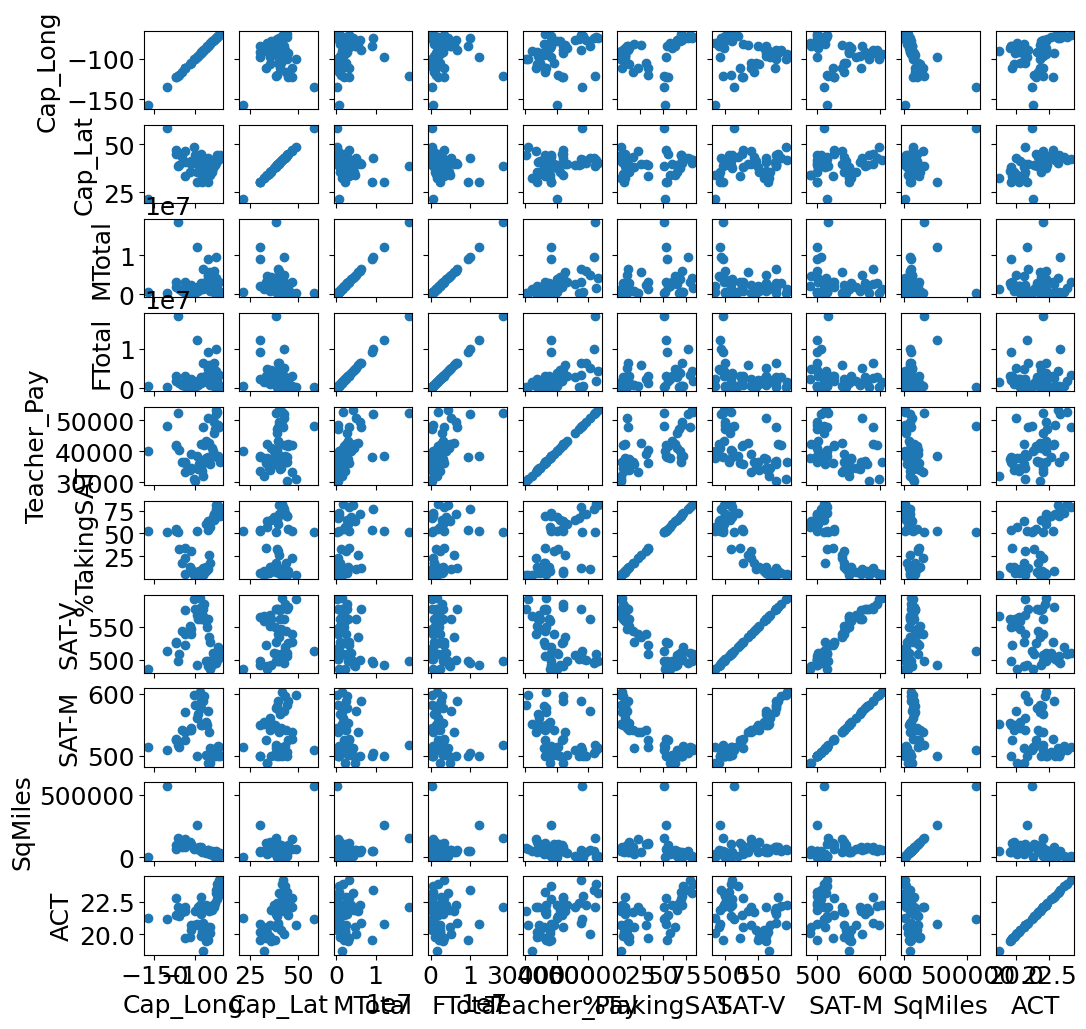

In [9]:
aobj = analysis.Analysis( dobj )
aobj.pair_plot(dobj.headers);

## 1. Predict a feature as a 2nd degree polynomial of another

Given one feature (percent taking SAT), can we predict another (SAT verbal score)?

Ahat:
 [[1.000e+00 9.000e+00 8.100e+01]
 [1.000e+00 5.100e+01 2.601e+03]
 [1.000e+00 3.400e+01 1.156e+03]
 [1.000e+00 6.000e+00 3.600e+01]
 [1.000e+00 5.100e+01 2.601e+03]
 [1.000e+00 3.100e+01 9.610e+02]
 [1.000e+00 8.200e+01 6.724e+03]
 [1.000e+00 6.700e+01 4.489e+03]
 [1.000e+00 5.400e+01 2.916e+03]
 [1.000e+00 6.300e+01 3.969e+03]
 [1.000e+00 5.200e+01 2.704e+03]
 [1.000e+00 1.700e+01 2.890e+02]
 [1.000e+00 1.200e+01 1.440e+02]
 [1.000e+00 6.000e+01 3.600e+03]
 [1.000e+00 5.000e+00 2.500e+01]
 [1.000e+00 9.000e+00 8.100e+01]
 [1.000e+00 1.200e+01 1.440e+02]
 [1.000e+00 7.000e+00 4.900e+01]
 [1.000e+00 6.900e+01 4.761e+03]
 [1.000e+00 6.500e+01 4.225e+03]
 [1.000e+00 7.900e+01 6.241e+03]
 [1.000e+00 1.100e+01 1.210e+02]
 [1.000e+00 9.000e+00 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01]
 [1.000e+00 8.000e+00 6.400e+01]
 [1.000e+00 2.300e+01 5.290e+02]
 [1.000e+00 8.000e+00 6.400e+01]
 [1.000e+00 3.300e+01 1.089e+03]
 [1.000e+00 7.200e+01 5.184e+03]
 [1.000e+00 8.100e+01 6.561e+03]
 [1

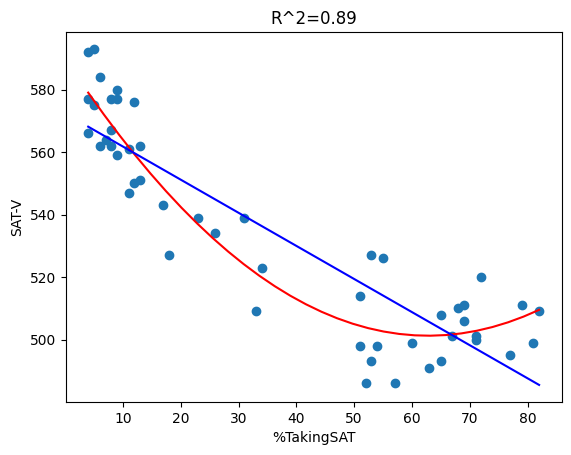

In [7]:
# Assign the name of the independent feature to indep_name
indep_name = '%TakingSAT'
# Assing the name of the dependent feature to dep_name
dep_name = 'SAT-V'
# call select_data with the indep_name and store it in x
x = dobj.select_data([indep_name])
N = x.shape[0]
# call select_data with dep_name as store it in y
y = dobj.select_data([dep_name])
degree = 2
# Make Ahat by hstacking a column of ones to the left of x and x^2
Ahat = np.ones( (N, degree+1) )

for i in range(1,degree+1):
    Ahat[:,i] = x.squeeze()**i
    
print("Ahat:\n", Ahat)
# Call lstsq and put the coefficients in c. we don't care to say the other 3 outputs,
c, _, _, _ = lstsq( Ahat, y)
print(c)

# call linspace to create a set of points ranging from min(A) to max(A). Store it in xline
# Make x values for line of regression
xline = np.linspace(x.min(),x.max(),30)
# Compute y values for line of regression
rline = c[0] + c[1]*xline + c[2]*xline**2

# Compute the predicted values of y for the points in A. Use Ahat and c. Store it in yPred
yPred = Ahat @ c
# Compute the R^2 value Store it in R2
R2 = 1 -  np.sum((y-yPred)**2) / np.sum((y-y.mean())**2)

# Make a new figure
plt.figure()
# Plot with our indep variable on the x-axis and our dep variable on the y-axis
plt.scatter( x, y )
# Add the regression line and make it red
plt.plot( xline ,rline, 'r')
# Label the axes
plt.xlabel( indep_name )
plt.ylabel( dep_name )
# Add the R^2 value as a title
plt.title(f"R^2={R2:0.2f}")

# Add line of linear regression
# Make Ahat
Ahat = np.hstack((np.ones([N,1]),x))
# Find c
c, _, _, _ = lstsq( Ahat, y )
# Make x values for line of regression
xline = np.linspace(x.min(),x.max(),30)
# Compute y values for line of regression
rline = c[0] + c[1]*xline
plt.plot( xline, rline, 'b')
yPred = Ahat @ c
resid = y - yPred
R2 = 1 - np.sum(resid**2) / np.sum((y - np.mean(y))**2)
print(f"R^2 for line = {R2:0.2f}")

## 2. Go nuts with polynomial degree

[[ 1.14675042e-05 -9.19457131e-04  1.45465520e-03  1.35099983e-02
   7.84611316e-02 -8.36459369e-03  3.62889439e-04 -8.24056287e-06
   1.03490779e-07 -6.82512563e-10  1.84897406e-12]]


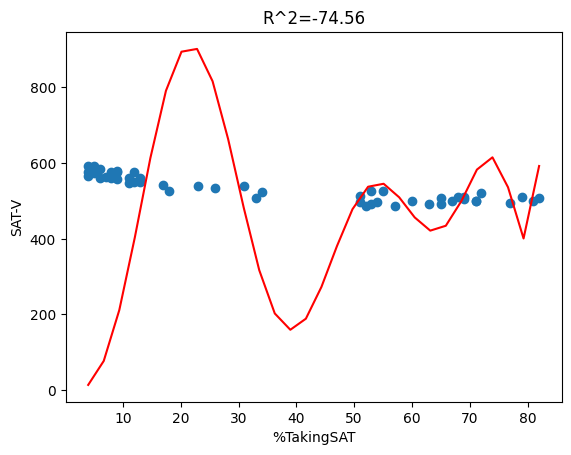

In [9]:
# Assign the name of the independent feature to indep_name
indep_name = '%TakingSAT'
# Assing the name of the dependent feature to dep_name
dep_name = 'SAT-V'
# call select_data with the indep_name and store it in x
x = dobj.select_data([indep_name])
N = x.shape[0]
# call select_data with dep_name as store it in y
y = dobj.select_data([dep_name])
degree = 10

# Make Ahat by hstacking a column of ones to the left of x and x^2
Ahat = np.ones( (N, degree+1) )
for i in range(1,degree+1):
    Ahat[:,i] = x.squeeze()**i
# Call lstsq and put the coefficients in c. we don't care to say the other 3 outputs,
c, _, _, _ = lstsq( Ahat, y)


# call linspace to create a set of points ranging from min(A) to max(A). Store it in xline
# Make x values for line of regression
xline = np.linspace(x.min(),x.max(),30)
# Compute y values for line of regression
rline = c[0]*np.ones(xline.shape)
for i in range(1,degree+1):
    rline += c[i]*xline**i

# Compute the predicted values of y for the points in A. Use Ahat and c. Store it in yPred
yPred = Ahat @ c
resid = y - yPred
R2 = 1 - np.sum(resid**2) / np.sum((y - np.mean(y))**2)


# Make a new figure
plt.figure()
# Plot with our indep variable on the x-axis and our dep variable on the y-axis
plt.scatter( x, y )
# Add the regression line and make it red
plt.plot( xline ,rline, 'r')
# Label the axes
plt.xlabel( indep_name )
plt.ylabel( dep_name )
# Add the R^2 value as a title
plt.title(f"R^2={R2:0.2f}")
print( c.T )